In [38]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Librería arch
# ==============================================================================
from arch import arch_model

# Librería statsmodels
# ==============================================================================
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

# Otros
# ==============================================================================
from scipy.stats import norm

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Configuración general de gráficos
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

# Experimento 1

### Aca simularemos modelos garch con la distribución normal, la idea es describir como es y como cambian segun los parametros

# Garch(1,1) con distintos parametros y con distribución normal

In [49]:
# Hiperparámetros
p = 1
q = 1

# Parámetros
mu = 0
omega = 0.4
alpha = [0.2, 0.5, 0.7]
beta = [0.7, 0.4, 0.2]

In [50]:
n_datos = 500
sim_mod = arch_model(None, p=p, o=0, q=q, dist="normal")
datos_simulados = []

# Simular trayectorias para cada configuración de alpha y beta
for i in range(len(alpha)):
    params = {"mu": mu, "omega": omega, f"alpha[1]": alpha[i], f"beta[1]": beta[i]}
    param = pd.Series(params)
    sim_data = sim_mod.simulate(param, nobs=n_datos)
    datos_simulados.append(sim_data["data"])

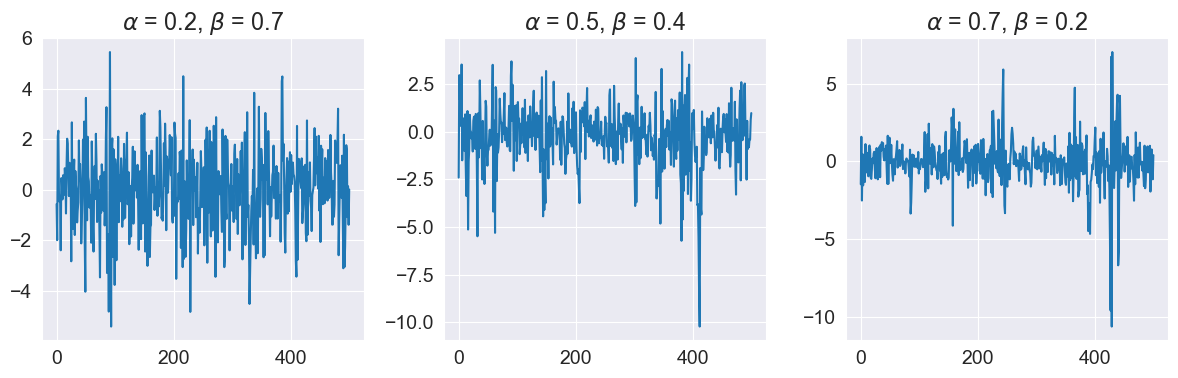

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Configuración de la primera figura
ax1.plot(datos_simulados[0])
ax1.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')

# Configuración de la segunda figura
ax2.plot(datos_simulados[1])
ax2.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')

# Configuración de la tercera figura
ax3.plot(datos_simulados[2])
ax3.set_title(fr'$\alpha$ = {alpha[2]}, $\beta$ = {beta[2]}')

# Ajustar el diseño y mostrar la imagen
plt.tight_layout()
plt.show()

# Garch(2,1) con distintos parametros y con distribución NORMAL

In [5]:
# Hiperparámetros
p = 2
q = 1

# Parámetros
mu = 0
omega = 0.4
alpha1 = [0.2, 0.5, 0.6]
alpha2 = [0.3, 0.2, 0.1]
beta = [0.4, 0.3, 0.2]

In [54]:
# Número de datos a simular
n_datos = 500

# Semilla para reproducibilidad
np.random.seed(42)

# Crear y simular el modelo GARCH para diferentes configuraciones de alpha y beta
sim_mod = arch_model(None, p=p, o=0, q=q, dist="normal")
datos_simulados = []

for i in range(len(alpha1)):
    # Definir los parámetros para la simulación
    params = {"mu": mu, "omega": omega, "alpha[1]": alpha1[i], "alpha[2]": alpha2[i], "beta[1]": beta[i]}
    param = pd.Series(params)

    # Simular una trayectoria y guardar los datos
    sim_data = sim_mod.simulate(param, nobs=n_datos)
    datos_simulados.append(sim_data["data"])

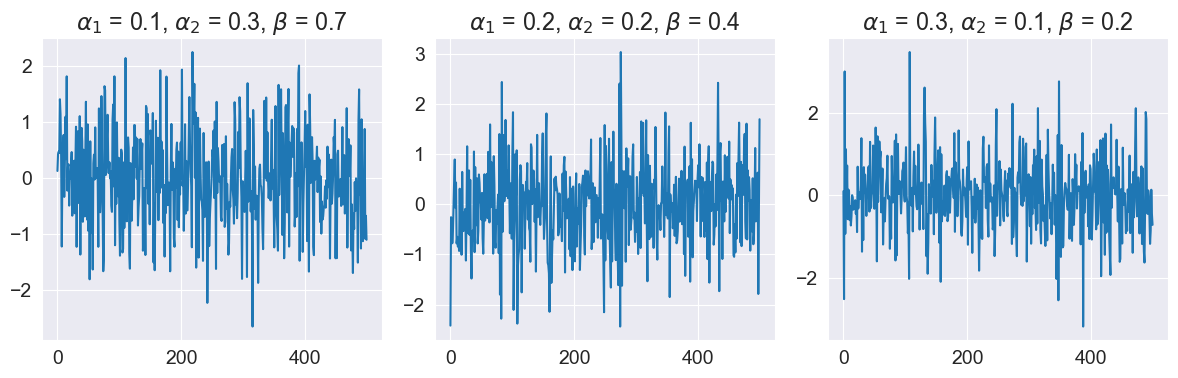

In [55]:
# Crear una figura con tres subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Graficar la primera configuración en el primer subgráfico
ax1.plot(datos_simulados[0])
ax1.set_title(fr'$\alpha_1$ = {alpha1[0]}, $\alpha_2$ = {alpha2[0]}, $\beta$ = {beta[0]}')

# Graficar la segunda configuración en el segundo subgráfico
ax2.plot(datos_simulados[1])
ax2.set_title(fr'$\alpha_1$ = {alpha1[1]}, $\alpha_2$ = {alpha2[1]}, $\beta$ = {beta[1]}')

# Graficar la tercera configuración en el tercer subgráfico
ax3.plot(datos_simulados[2])
ax3.set_title(fr'$\alpha_1$ = {alpha1[2]}, $\alpha_2$ = {alpha2[2]}, $\beta$ = {beta[2]}')

# Ajustar el diseño y mostrar la imagen
plt.tight_layout()
plt.show()

## Intercambiando los alphas

In [8]:
alpha2 = [0.2,0.5,0.6]
alpha1 = [0.3,0.2,0.1]

In [9]:
n_datos = 500
sim_mod = arch_model(None, p=p, o=0, q=q,dist="normal")
datos_simulados = []
for i in range(len(alpha)):
    params = {"mu":mu,"omega": omega,"alpha[1]":alpha1[i],"alpha[2]":alpha2[i],"beta[1]":beta[i]}
    param = pd.Series(params)
    sim_data = sim_mod.simulate(param, n_datos)
    datos_simulados.append(sim_data["data"])

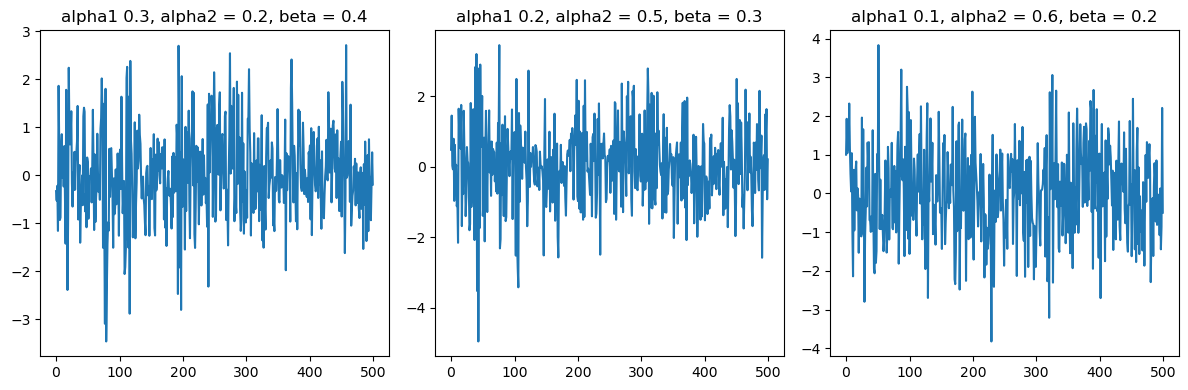

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(datos_simulados[0])
ax1.set_title(f'alpha1 {alpha1[0]}, alpha2 = {alpha2[0]}, beta = {beta[0]}')

# Figura 2
ax2.plot(datos_simulados[1])
ax2.set_title(f'alpha1 {alpha1[1]}, alpha2 = {alpha2[1]}, beta = {beta[1]}')

# Figura 3
ax3.plot(datos_simulados[2])
ax3.set_title(f'alpha1 {alpha1[2]}, alpha2 = {alpha2[2]}, beta = {beta[2]}')

# Ajustar el diseño y mostrar la imagen
plt.tight_layout()
plt.show()

# Garch(2,2) con distintos parametros y con distribución NORMAL

In [11]:
#hiperarametros

P= 2
q =1

#parametros
mu =0
omega = 0.4
alpha1 = [0.1,0.2,0.3]
alpha2 = [0.3,0.2,0.1]
beta1 = [0.4,0.3,0.2]
beta2 = [0.2,0.25,0.35]

In [12]:
n_datos = 500
sim_mod = arch_model(None, p=p, o=0, q=q,dist="normal")
datos_simulados = []
for i in range(len(alpha)):
    params = {"mu":mu,"omega": omega,"alpha[1]":alpha1[i],"alpha[2]":alpha2[i],"beta[1]":beta1[i],"beta[2]":beta2[i]}
    param = pd.Series(params)
    sim_data = sim_mod.simulate(param, n_datos)
    datos_simulados.append(sim_data["data"])

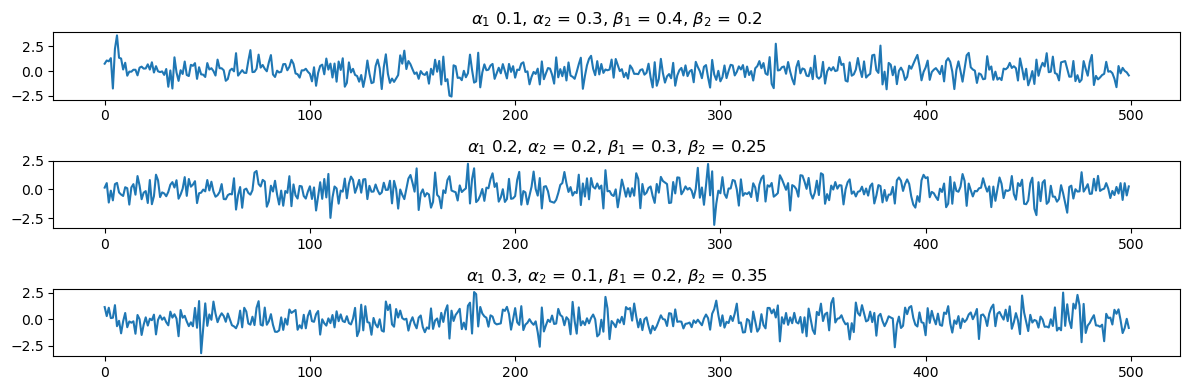

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 4))
ax1.plot(datos_simulados[0])
ax1.set_title(fr'$\alpha_{1}$ {alpha1[0]}, $\alpha_{2}$ = {alpha2[0]}, $\beta_{1}$ = {beta1[0]}, $\beta_{2}$ = {beta2[0]}')

# Figura 2
ax2.plot(datos_simulados[1])
ax2.set_title(fr'$\alpha_{1}$ {alpha1[1]}, $\alpha_{2}$ = {alpha2[1]}, $\beta_{1}$ = {beta1[1]}, $\beta_{2}$ = {beta2[1]}')

# Figura 3
ax3.plot(datos_simulados[2])
ax3.set_title(fr'$\alpha_{1}$ {alpha1[2]}, $\alpha_{2}$ = {alpha2[2]}, $\beta_{1}$ = {beta1[2]}, $\beta_{2}$ = {beta2[2]}')

# Ajustar el diseño y mostrar la imagen
plt.tight_layout()
plt.show()

# Experimento 2

### Simulacion de la serie con distribución t student, misma idea que antes y se puede agregar las diferencias entre las distribuciones

# Garch(1,1) con distintos parametros y con distribución t de 3 a 5 grados de libertad

In [14]:
#hiperarametros

p= 1
q =1

#parametros
mu =0
omega = 0.4
alpha = [0.2,0.5,0.7]
beta = [0.7,0.4,0.2]
nu = [3,4,5]

In [15]:
n_datos = 500
sim_mod = arch_model(None, p=p, o=0, q=q,dist="StudentsT")
datos_simulados = []
for i in range(len(nu)):
    for j in range(len(alpha)):
        params = {"mu":mu,"omega": omega,"alpha[1]":alpha[j],"beta[1]":beta[j],"nu":nu[i]}
        param = pd.Series(params)
        sim_data = sim_mod.simulate(param, n_datos)
        datos_simulados.append(sim_data["data"])

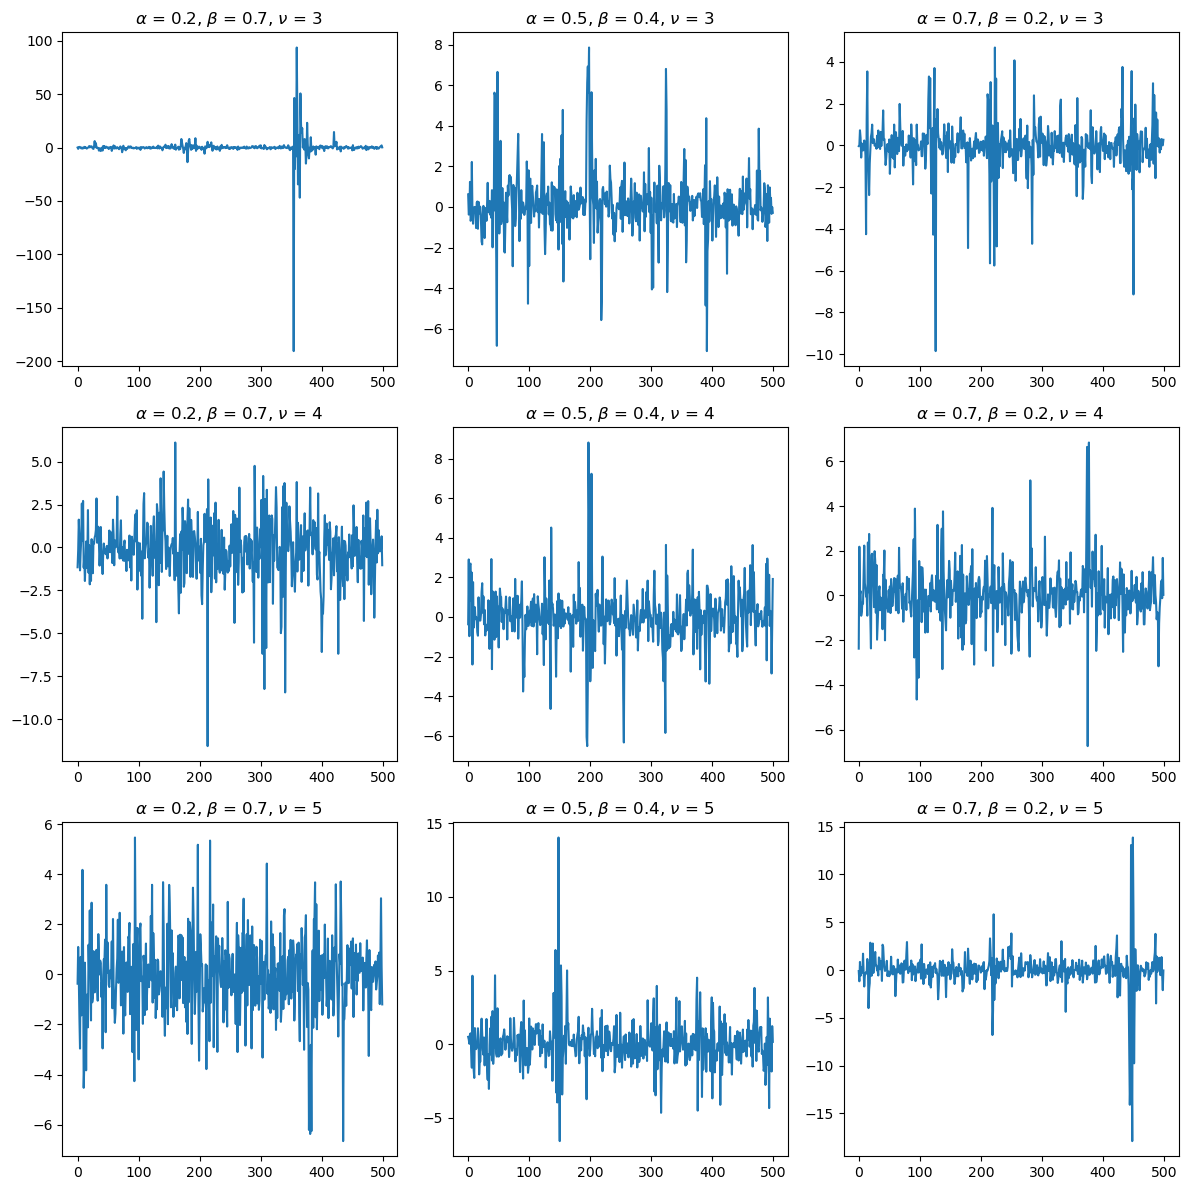

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
i=0
j=0
h=0
for ax in axes:
    ax.plot(datos_simulados[i]) 
    if i ==0 or i==1 or i==2:
        ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}, $\nu$ = {nu[0]} ')  
    
    if i==3 or i==4 or i==5:
        ax.set_title(fr'$\alpha$ = {alpha[j]}, $\beta$ = {beta[j]}, $\nu$ = {nu[1]} ')  
        j = j+1
        
    if i==6 or i==7 or i==8:
        ax.set_title(fr'$\alpha$ = {alpha[h]}, $\beta$ = {beta[h]}, $\nu$ = {nu[2]} ') 
        h=h+1
        
    i = i+1
        

        
        
plt.tight_layout()
plt.show()

# Experimento 3

### Verificar la covarianza teorica del garch(1,1), para distintos largos de series y numero de trayectorias, el resultado esta en el libro "GARCH forescasting model" pagina 50 

In [17]:
def acf_garch(a,b,h):
    # h>=1
    # a: alpha
    # b: beta
    p_1 = a*(1-b*(a+b))/(1-(a+b)**2+a**2) 
    p_h = p_1 *(a+b)**(h-1)
    return p_h

In [18]:
def sim_garch(n,m,a,b,omega):
    # n: numero de series simuladas
    # m: datos de la serie a simular
    # omega : omega
    sim_mod = arch_model(None, p=1, o=0, q=1,dist="normal")
    params = {"mu":0,"omega": omega,"alpha[1]":a,"beta[1]":b}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        sim_data = sim_mod.simulate(param, m) #1000000
        datos_simulados.append(sim_data["data"])
    
    
    acfs = []
    for i in range(n):
        acfs.append(acf(np.square(datos_simulados[i]),nlags = 20))
    
    df = pd.DataFrame(acfs, columns=np.arange(0, 21))
    acf_mean = df.mean()
    acf_teory_1 = []
    acf1 = acf_mean[1:20]
    for i in range(1,20):
        acf_teory_1.append(acf_garch(a,b,i))
    
    return acf1,acf_teory_1

In [19]:
x = np.arange(1,20)
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = 0.1


## n = 100 y m = 500 

In [20]:
acf_m = []
acf_t = []
n=100
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

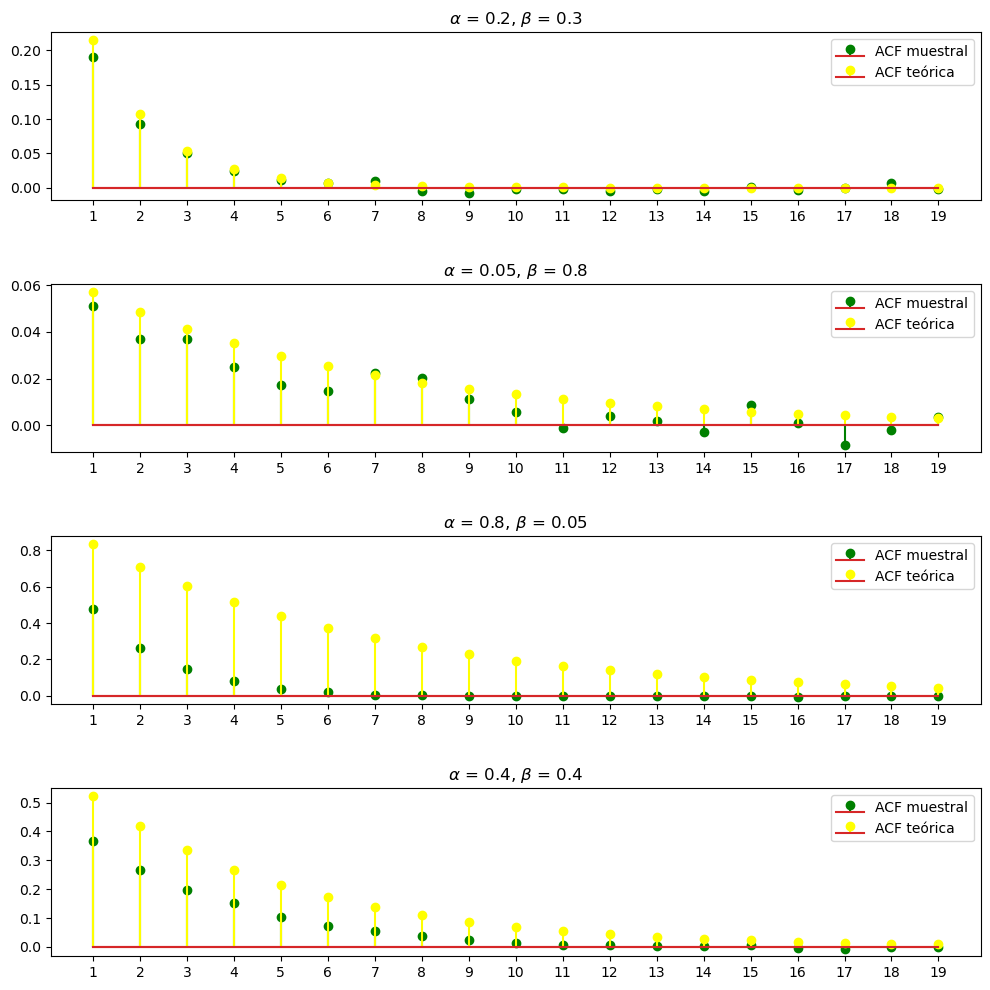

In [21]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n = 100 y m=1000

In [22]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


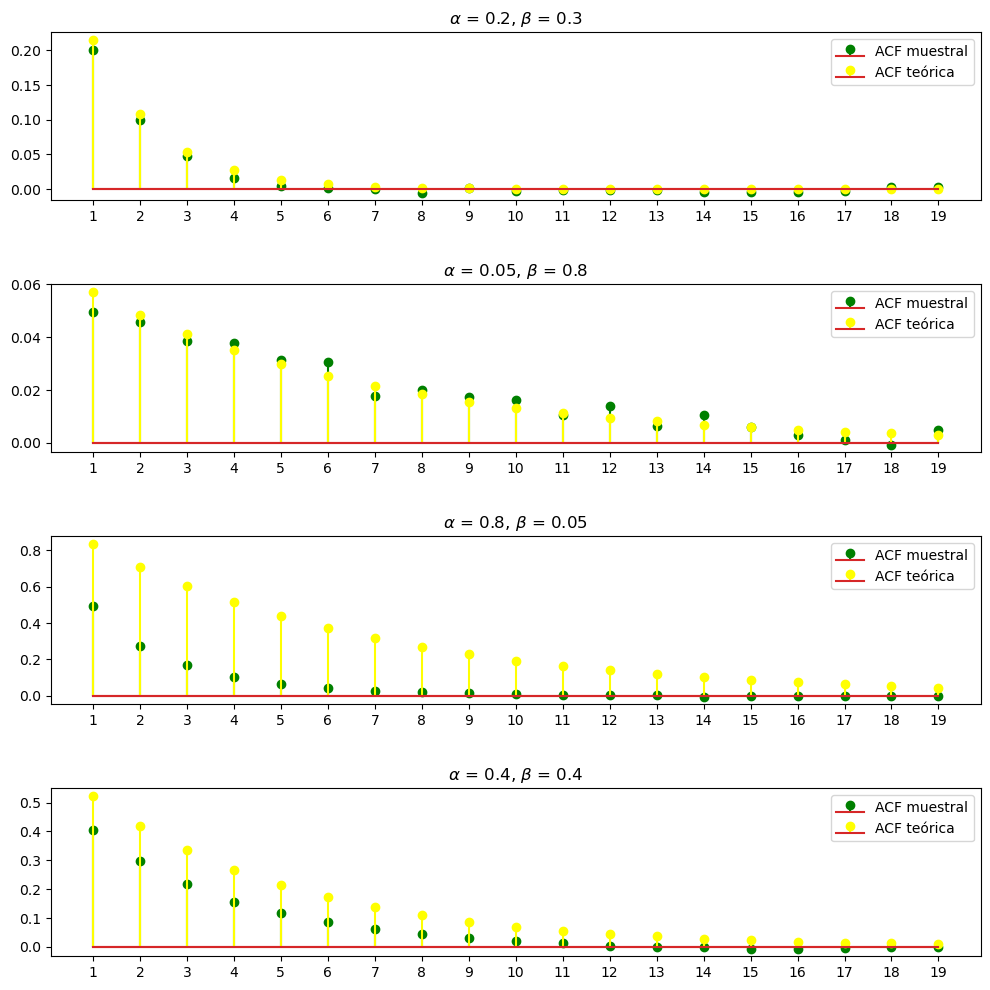

In [23]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=1000

In [24]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

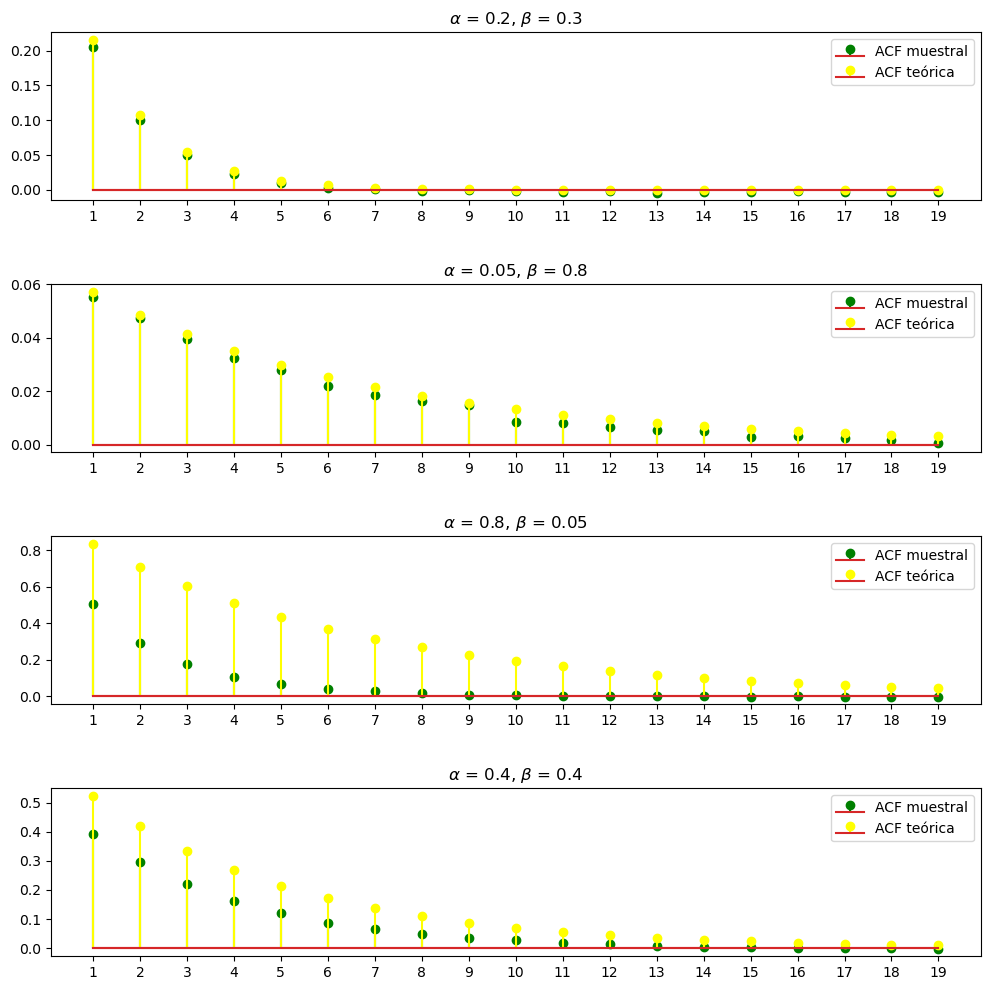

In [25]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=10000

In [26]:
acf_m = []
acf_t = []
n=1000
m=10000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

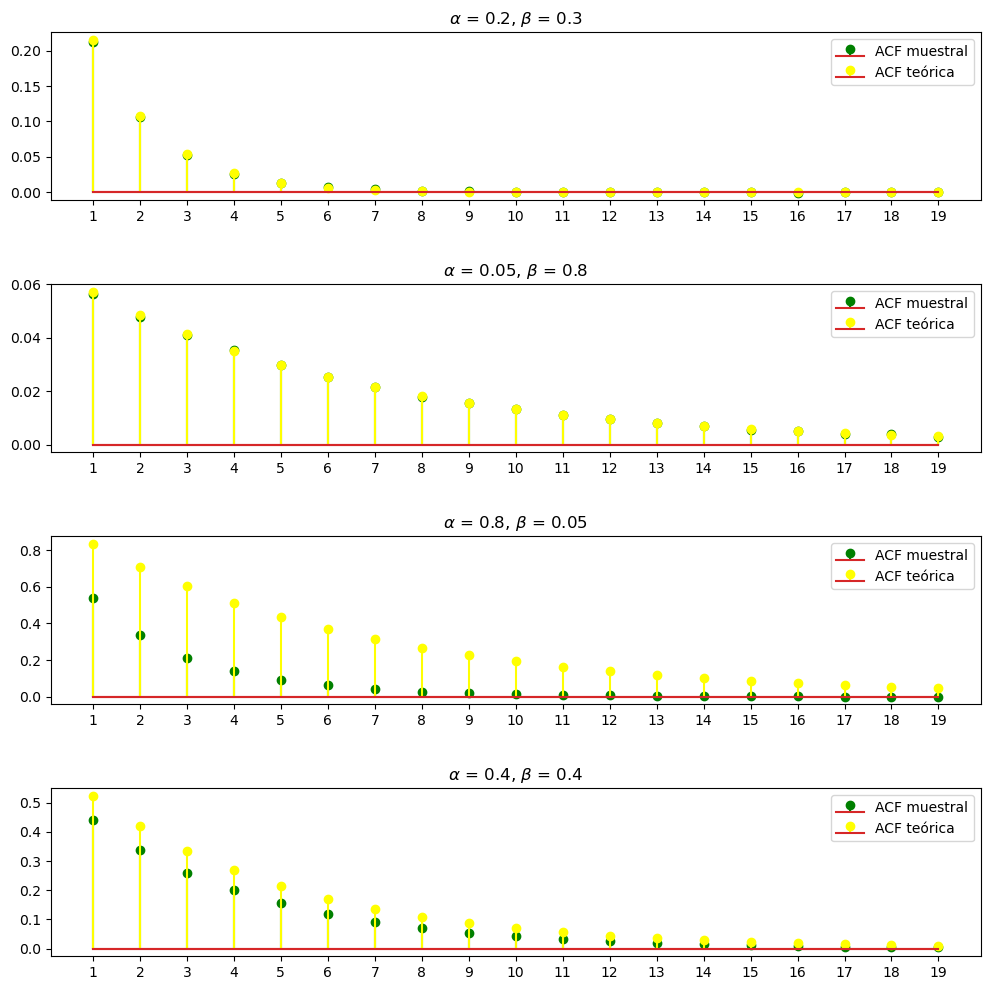

In [27]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

# Experimento 4

### La idea es simular series y estimar los parametros, y luego ver su distribucion y comparar lo teorico, que es NORMAL, basado en "Trabajo de Grado sobre Modelos ARCH y GARCH" pagina 30 en el lector de pdf

In [28]:
def sim_and_stim(n,m,alpha,beta,omega):
    sim_mod = arch_model(None, p=1, o=0, q=1,dist="normal")
    params = {"mu":0,"omega": omega,"alpha[1]":alpha,"beta[1]":beta}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        sim_data = sim_mod.simulate(param, m)
        datos_simulados.append(sim_data["data"])
    columns = ["mu","omega","alpha1","beta1"]
    parametros = pd.DataFrame(columns=columns)
    for i in range(n):
        modelo = arch_model(datos_simulados[i], p=1, o=0, q=1)
        res = modelo.fit(disp="off")
        new_row = pd.DataFrame([res.params.values], columns=columns)
        parametros = pd.concat([parametros,new_row], axis=0)
    return parametros

In [29]:
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = [0.1,0.3,0.6,0.8]
n = 1000
m = 1000

In [30]:
param = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param.append(result)

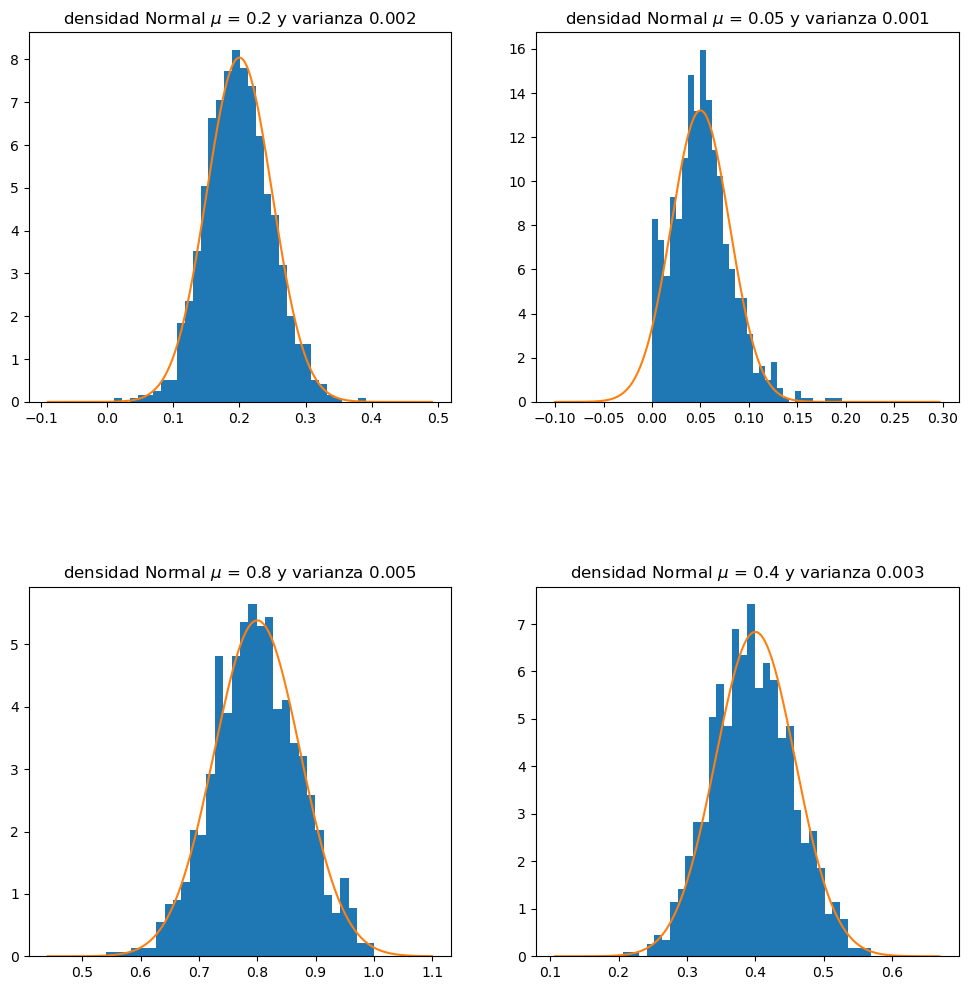

In [31]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["alpha1"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x-alpha[i])**2/(2*np.var(param[i]["alpha1"])))/np.sqrt(2*np.pi*np.var(param[i]["alpha1"]))
    x = np.linspace(min(param[i]["alpha1"])-0.1, max(param[i]["alpha1"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\alpha$ = {alpha[i]}')
    var = round(np.var(param[i]["alpha1"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {alpha[i]} y varianza {var}')
    i = i+1

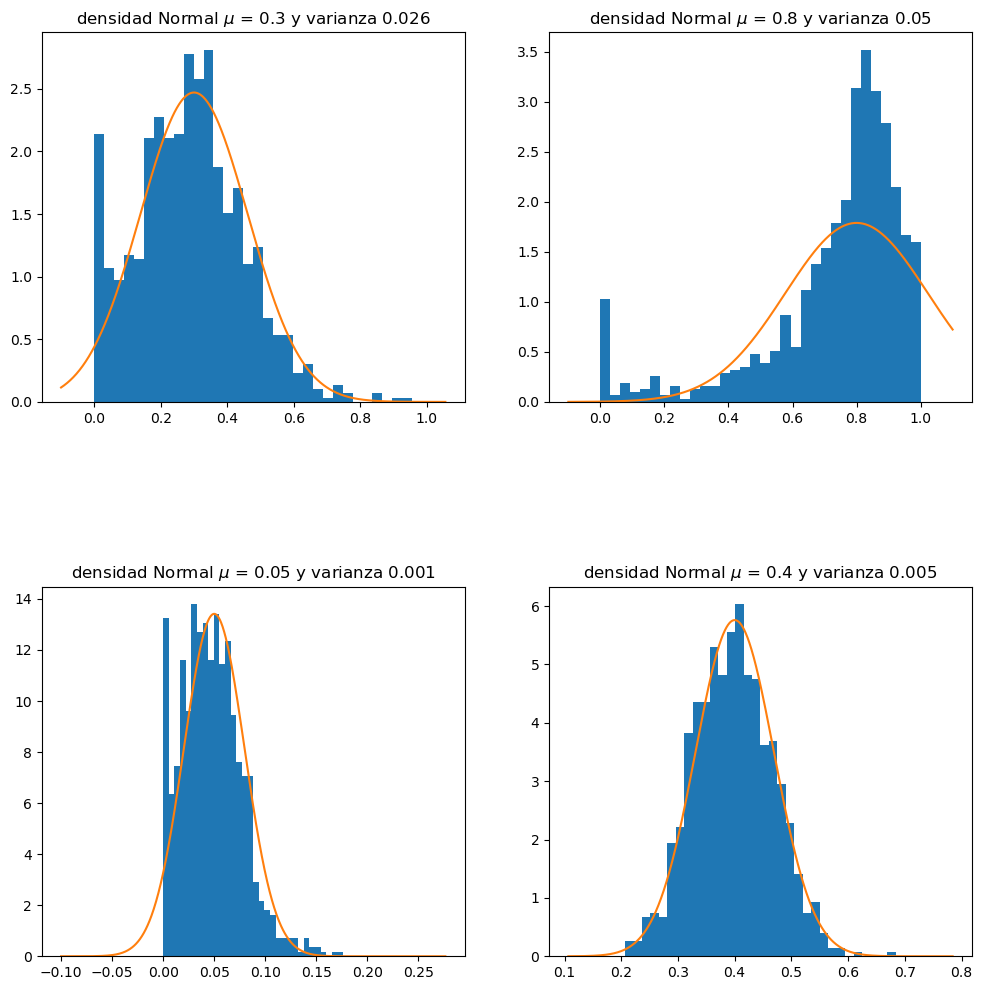

In [32]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["beta1"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x-beta[i])**2/(2*np.var(param[i]["beta1"])))/np.sqrt(2*np.pi*np.var(param[i]["beta1"]))
    x = np.linspace(min(param[i]["beta1"])-0.1, max(param[i]["beta1"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\beta$ = {beta[i]}')
    var = round(np.var(param[i]["beta1"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {beta[i]} y varianza {var}')
    i = i+1

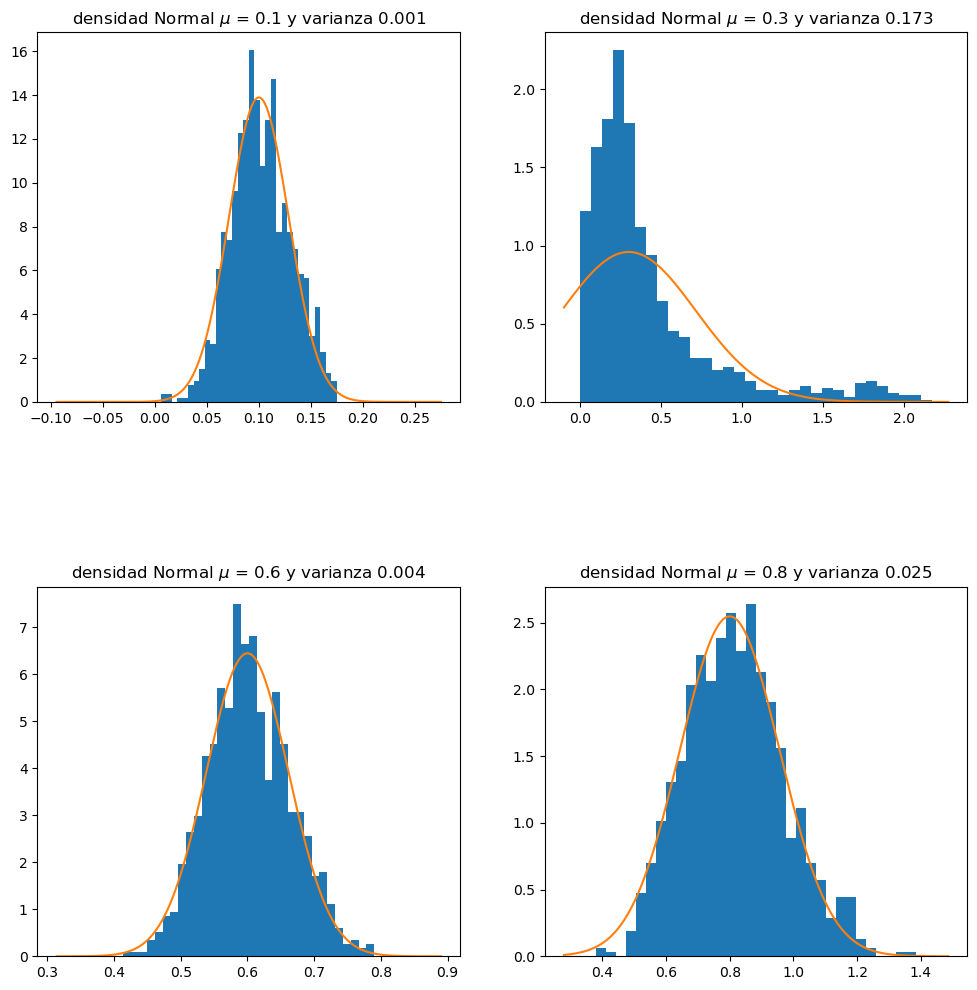

In [33]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["omega"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x-omega[i])**2/(2*np.var(param[i]["omega"])))/np.sqrt(2*np.pi*np.var(param[i]["omega"]))
    x = np.linspace(min(param[i]["omega"])-0.1, max(param[i]["omega"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\omega$ = {omega[i]}')
    var = round(np.var(param[i]["omega"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {omega[i]} y varianza {var}')
    i = i+1